# Linear Regression

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv('../data/weight-height.csv')

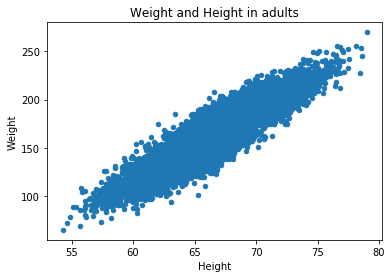

In [37]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

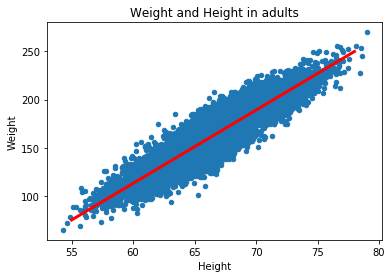

In [38]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [39]:
def line(x, w=0, b=0):
    return x * w + b

In [40]:
x = np.linspace(55, 80, 100)

In [41]:
yhat = line(x, w=0, b=0)

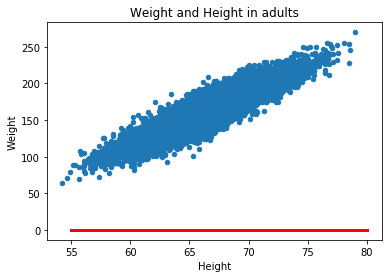

In [42]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [43]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [44]:
X = df[['Height']].values
y_true = df['Weight'].values

In [45]:
y_pred = line(X)

In [46]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### Updates

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

Text(0.5, 0, 'b')

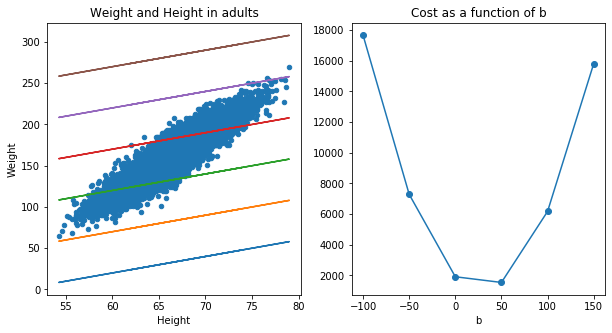

In [99]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [48]:
model = Sequential()

In [49]:
model.add(Dense(1, input_shape=(1,)))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [54]:
model.fit(X, y_true, epochs=40, verbose=0)

In [55]:
y_pred = model.predict(X)

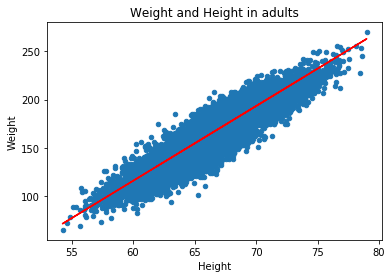

In [56]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [57]:
W, B = model.get_weights()
print(W,B)

[[7.763994]] [-350.17215]


## Evaluating Model Performance

In [58]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.842


### Train Test Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [60]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [61]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [62]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [63]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	236.5
The Mean Squared Error on the Test set is:	237.8


In [64]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.768
The R2 score on the Test set is:	0.779


# Classification

In [65]:
df = pd.read_csv('../data/user_visit_duration.csv')
df.head(2)

,Time (min),Buy
0,2.000000,0
1,0.683333,0


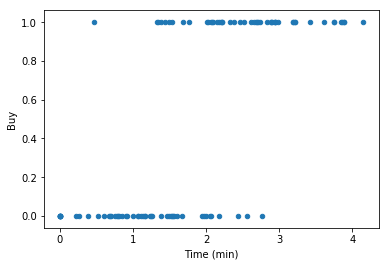

In [66]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [108]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [109]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [111]:
X = df[['Time (min)']].values
y = df['Buy'].values
model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1764 - acc: 0.4100
Epoch 2/25
100/100 [==============================] - 0s 324us/step - loss: 0.6566 - acc: 0.5000
Epoch 3/25
100/100 [==============================] - 0s 90us/step - loss: 0.6242 - acc: 0.6200
Epoch 4/25
100/100 [==============================] - 0s 178us/step - loss: 0.5813 - acc: 0.7000
Epoch 5/25
100/100 [==============================] - 0s 55us/step - loss: 0.5849 - acc: 0.6500
Epoch 6/25
100/100 [==============================] - 0s 61us/step - loss: 0.5345 - acc: 0.7200
Epoch 7/25
100/100 [==============================] - 0s 63us/step - loss: 0.5173 - acc: 0.7600
Epoch 8/25
100/100 [==============================] - 0s 118us/step - loss: 0.5113 - acc: 0.7500
Epoch 9/25
100/100 [==============================] - 0s 106us/step - loss: 0.5294 - acc: 0.7500
Epoch 10/25
100/100 [==============================] - 0s 186us/step - loss: 0.4900 - acc: 0.8400
Epoch 11/25
100/100 [==============

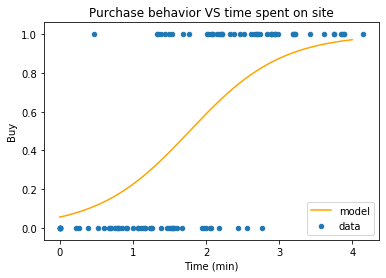

In [112]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [113]:
temp_class = model.predict(temp) > 0.5

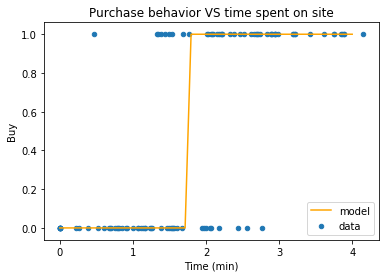

In [114]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [58]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [60]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.800


### Train/Test split


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [63]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [64]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [265]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.762
The test accuracy score is 0.761


## Cross Validation

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier

In [67]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [68]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [69]:
from sklearn.model_selection import cross_val_score, KFold

In [70]:
cv = KFold(3, shuffle=True)

In [71]:
scores = cross_val_score(model, X, y, cv=cv)

In [72]:
scores

array([0.91176471, 0.78787879, 0.78787879])

In [73]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8292 ± 0.0584


## Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y, y_class_pred)

array([[36, 14],
       [ 6, 44]])

In [76]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [77]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,36,14
Buy,6,44


In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [79]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.759
Recall:  	0.880
F1 Score:	0.815


In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        50
           1       0.76      0.88      0.81        50

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100



## Feature Preprocessing

### Categorical Features

In [82]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [83]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [84]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [85]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [86]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [87]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [88]:

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


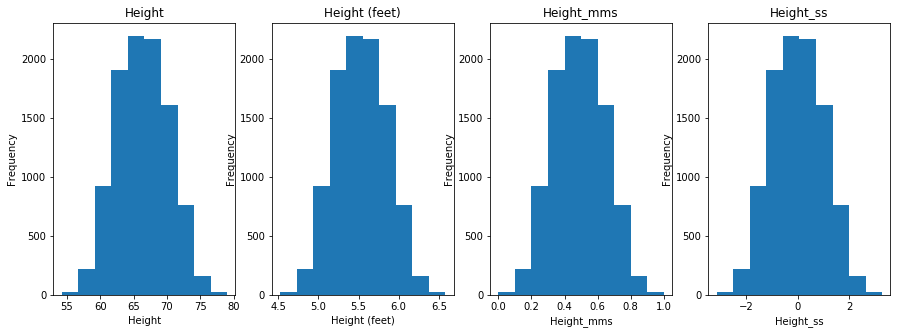

In [89]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [2]:
df = pd.read_csv('../data/housing-data.csv')

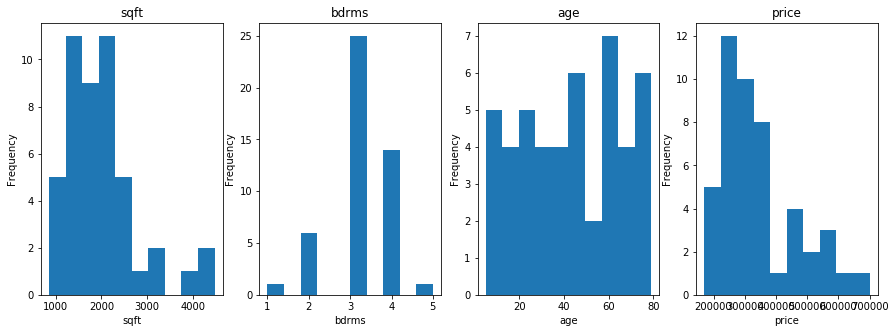

In [3]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['sqft', 'bdrms', 'age', 'price']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [4]:
X = df[['sqft', 'bdrms', 'age']]
y = df['price']

In [179]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

model.fit(X_train, y_train, epochs=500, verbose=0)

In [182]:
# model evaluation for training set
y_train_pred = model.predict(X_train)

r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_pred = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
R2 score is 0.7344129703523516


The model performance for testing set
--------------------------------------
R2 score is 0.4686694033362059


#### Normalization

In [183]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [184]:
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5

In [185]:
df.head()

,sqft,bdrms,age,price,sqft1000,age10,price100k
0,2104,3,70,399900,2.104,7.0,3.999
1,1600,3,28,329900,1.600,2.8,3.299
2,2400,3,44,369000,2.400,4.4,3.690
3,1416,2,49,232000,1.416,4.9,2.320
4,3000,4,75,539900,3.000,7.5,5.399


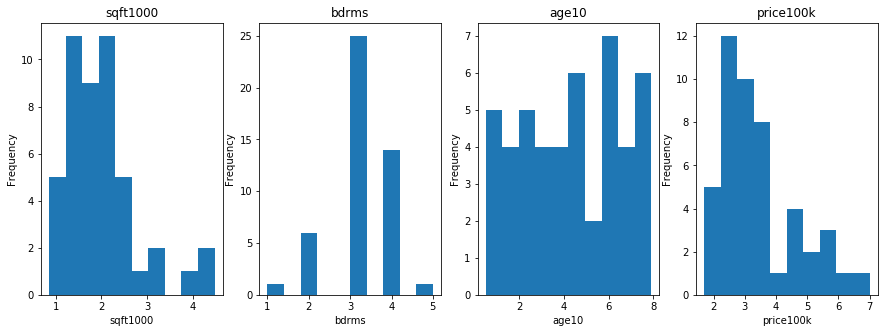

In [188]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['sqft1000', 'bdrms', 'age10', 'price100k']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [189]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

model.fit(X_train, y_train, epochs=500, verbose=0)

# model evaluation for training set
y_train_pred = model.predict(X_train)

r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_pred = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
R2 score is 0.7438524411816698


The model performance for testing set
--------------------------------------
R2 score is 0.565754968761262


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [5]:
df = pd.read_csv('../data/HR_comma_sep.csv')
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.left.value_counts()/len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [21]:
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [9]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours','time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary']

In [10]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

In [25]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 
                   'number_project','average_montly_hours_100','time_spend_company', 'Work_accident', 'left',
                   'promotion_last_5years']],
               df_dummies], axis=1).values
y = df['left'].values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

model = Sequential()
model.add(Dense(1, input_shape=(21,), activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 22        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, epochs=25, verbose=0)

print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 1.000
The test accuracy score is 1.000


## Cross Validation

In [270]:
from keras.wrappers.scikit_learn import KerasClassifier

In [276]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(9,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [277]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [278]:
from sklearn.model_selection import cross_val_score, KFold

In [279]:
cv = KFold(3, shuffle=True)

In [280]:
scores = cross_val_score(model, X_train, y_train, cv=cv)

In [281]:
scores

array([0.77104478, 0.75164179, 0.76381009])

In [282]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7622 ± 0.0080
